In [2]:
import os
import pandas as pd
import numpy as np
from cycler import cycler
import matplotlib as mpl
import matplotlib.pyplot as plt

FILENAME = 'results/results6.csv'
TESTDIR = 'tests/test6_unfix_c6'
PLOTDIR = 'tests/test6_unfix_c6/plots'
FORMAT = 'png'

# Create target Directory if don't exist
if not os.path.exists(PLOTDIR):
    os.mkdir(PLOTDIR)
    print("Directory " , PLOTDIR ,  " Created ")

In [ ]:
''' Merge csv files '''

dlist = []
dirs = [d for d in os.listdir(TESTDIR) if os.path.isdir(os.path.join(TESTDIR,d))]
for d in dirs:
	d = os.path.abspath(TESTDIR+'/'+d)
	dlist += [os.path.join(d,file) for file in os.listdir(d) if file.endswith(".csv")]

df = pd.read_csv(dlist[0], skipinitialspace=True)
for x in range(1,len(dlist)):
    df = df.append(pd.read_csv(dlist[x], skipinitialspace=True))
df.to_csv(FILENAME,index=False)

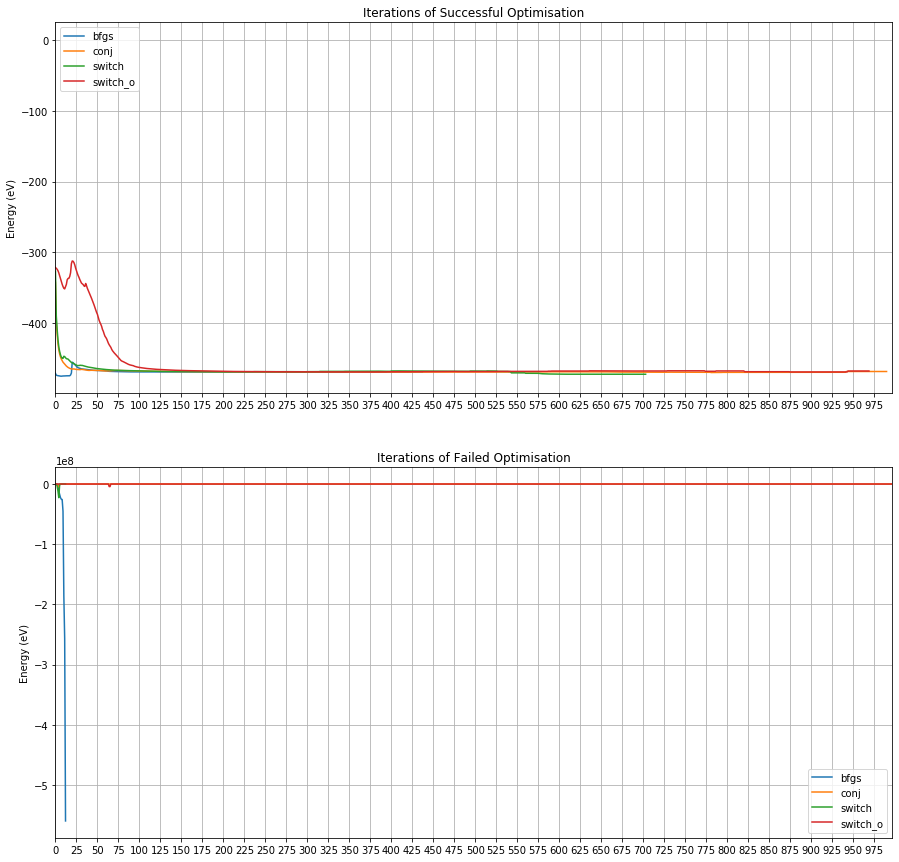

In [3]:
''' Mean of energy value per iteration '''

filename = 'iters'
df = pd.read_csv(FILENAME, skipinitialspace=True)
dfe = pd.read_csv(TESTDIR+'/'+filename+'_energy.csv', skipinitialspace=True)
methods = list(df['method'].unique()) # list of methods

xticks = 0
fig, axs = plt.subplots(2, 1, figsize=(15,15))

# Total 
for method in methods: # for each method keep structures from both dfs

    total_m = df.loc[(df['method'] == method)][['structure',
                                                   'opt_succ']].set_index('structure')
    dfe_m = dfe[dfe['method'] == method] # results for this method 
    dfe_m.set_index('structure')
    e_res = dfe_m.join(total_m, on='structure') # join on each struct

    # find successful cases
    e_succ = e_res.loc[e_res['opt_succ'] == True]
    e_succ.drop(['opt_succ'], axis=1)
    mean = e_succ.groupby(['method']).mean().T # mean of each iteration in one column
    mean.columns = ['energy']

    axs[0].plot(mean['energy'], label=method)
    axs[0].legend()
    lmean = len(mean.dropna())
    xticks = lmean if lmean > xticks else xticks
    
    # find failed cases
    e_fail = e_res.loc[e_res['opt_succ'] == False]
    e_fail.drop(['opt_succ'], axis=1)
    mean = e_fail.groupby(['method']).mean().T # mean of each iteration in one column
    mean.columns = ['energy']

    axs[1].plot(mean['energy'], label=method)
    axs[1].legend()
    
axs[0].grid()
axs[0].set_title('Iterations of Successful Optimisation')
axs[0].set_ylabel('Energy (eV)')
# axs[0].set_ylim(starty, -300)
axs[0].set_xlim(0, xticks+5)
axs[0].set_xticks(np.arange(0, xticks+5, 25))
starty, endy = axs[0].get_ylim()

axs[1].grid()
axs[1].set_xlim(0, xticks+5)
axs[1].set_xticks(np.arange(0, xticks+5, 25))
# axs[1].set_ylim(starty, endy)
axs[1].set_title('Iterations of Failed Optimisation')
axs[1].set_ylabel('Energy (eV)')
# axs[1].ticklabel_format(style='plain', axis='y', scilimits=(0,0))

plt.savefig(PLOTDIR+'/'+'MeanEnergyIterI', format=FORMAT)
plt.show()

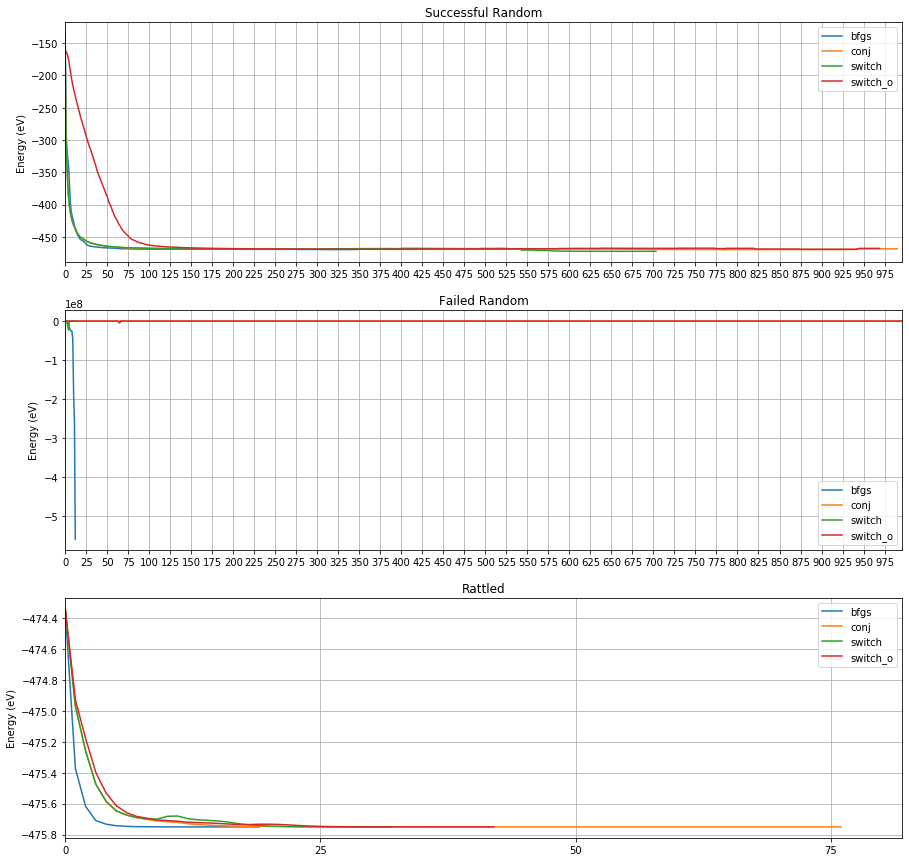

In [4]:
''' Mean of energy value per iteration '''

filename = 'iters'
df = pd.read_csv(FILENAME, skipinitialspace=True)
dfe = pd.read_csv(TESTDIR+'/'+filename+'_energy.csv', skipinitialspace=True)
methods = list(df['method'].unique()) # list of methods

fig, axs = plt.subplots(3, 1, figsize=(15,15))

# Random 
random = df[df['structure'].str.contains(
        "rat") == False]

xticks = 0
for method in methods: # for each method keep structures from both dfs

    total_m = random.loc[(random['method'] == method)][['structure',
                                                   'opt_succ']].set_index('structure')
    dfe_m = dfe[dfe['method'] == method] # results for this method 
    dfe_m.set_index('structure')
    e_res = dfe_m.join(total_m, on='structure') # join on each struct

    # find successful cases
    e_succ = e_res.loc[e_res['opt_succ'] == True]
    e_succ.drop(['opt_succ'], axis=1)
    mean = e_succ.groupby(['method']).mean().T # mean of each iteration in one column
    mean.columns = ['energy']

    axs[0].plot(mean['energy'], label=method)
    axs[0].legend()
    lmean = len(mean.dropna())
    xticks = lmean if lmean > xticks else xticks
    
    # find failed cases
    e_fail = e_res.loc[e_res['opt_succ'] == False]
    e_fail.drop(['opt_succ'], axis=1)
    mean = e_fail.groupby(['method']).mean().T # mean of each iteration in one column
    mean.columns = ['energy']

    axs[1].plot(mean['energy'], label=method)
    axs[1].legend()
    
axs[0].grid()
axs[0].set_title('Successful Random')
axs[0].set_ylabel('Energy (eV)')
# axs[0].set_ylim(starty, -300)
axs[0].set_xlim(0, xticks+5)
axs[0].set_xticks(np.arange(0, xticks+5, 25))
starty, endy = axs[0].get_ylim()

axs[1].grid()
axs[1].set_xlim(0, xticks+5)
axs[1].set_xticks(np.arange(0, xticks+5, 25))
# axs[1].set_ylim(starty, endy)
axs[1].set_title('Failed Random')
axs[1].set_ylabel('Energy (eV)')
# axs[1].ticklabel_format(style='plain', axis='y', scilimits=(0,0))


# Rattled
rattled = df[df['structure'].str.contains(
        "rat") == True]

xticks = 0
for method in methods: # for each method keep structures from both dfs

    total_m = rattled.loc[(rattled['method'] == method)][['structure',
                                                   'opt_succ']].set_index('structure')
    dfe_m = dfe[dfe['method'] == method] # results for this method 
    dfe_m.set_index('structure')
    e_res = dfe_m.join(total_m, on='structure') # join on each struct

    # find successful cases
    e_succ = e_res.loc[e_res['opt_succ'] == True]
    e_succ.drop(['opt_succ'], axis=1)
    mean = e_succ.groupby(['method']).mean().T # mean of each iteration in one column
    mean.columns = ['energy']

    axs[2].plot(mean['energy'], label=method)
    axs[2].legend()
    lmean = len(mean.dropna())
    xticks = lmean if lmean > xticks else xticks
    
axs[2].grid()
axs[2].set_title('Rattled')
axs[2].set_ylabel('Energy (eV)')
axs[2].set_xlim(0, xticks+5)
axs[2].set_xticks(np.arange(0, xticks+5, 25))
starty, endy = axs[2].get_ylim()

plt.savefig(PLOTDIR+'/'+'MeanEnergyIterII', format=FORMAT)
plt.show()

In [ ]:
''' Mean of gnorm value per iteration '''
# %pylab

filename = 'iters'
df = pd.read_csv(FILENAME, skipinitialspace=True)
dfg = pd.read_csv(TESTDIR+'/'+filename+'_gnorm.csv', skipinitialspace=True)
methods = list(df['method'].unique()) # list of methods

xticks = 0
fig, axs = plt.subplots(2, 1, figsize=(15,15))

# Total 
for method in methods: # for each method keep structures from both dfs

    total_m = df.loc[(df['method'] == method)][['structure',
                                                   'opt_succ']].set_index('structure')
    dfg_m = dfg[dfg['method'] == method] # results for this method 
    dfg_m.set_index('structure')
    e_res = dfg_m.join(total_m, on='structure') # join on each struct

    # find successful cases
    e_succ = e_res.loc[e_res['opt_succ'] == True]
    e_succ.drop(['opt_succ'], axis=1)
    mean = e_succ.groupby(['method']).mean().T # mean of each iteration in one column
    mean.columns = ['gnorm']

    axs[0].plot(mean['gnorm'], label=method)
    axs[0].legend()
    lmean = len(mean.dropna())
    xticks = lmean if lmean > xticks else xticks
    
    # find failed cases
    e_fail = e_res.loc[e_res['opt_succ'] == False]
    e_fail.drop(['opt_succ'], axis=1)
    mean = e_fail.groupby(['method']).mean().T # mean of each iteration in one column
    mean.columns = ['gnorm']

    axs[1].plot(mean['gnorm'], label=method)
    axs[1].legend()
    
axs[0].grid()
axs[0].set_xticks([])
axs[0].set_xlim(0, xticks+5)
axs[0].set_xticks(np.arange(0, xticks+5, 25))
axs[0].set_title('Iterations of Successful Optimisation')
axs[0].set_ylabel('Gnorm (eV)')

axs[1].grid()
axs[1].set_xlim(-5, xticks+5)
axs[1].set_xticks(np.arange(0, xticks+5, 25))
axs[1].set_title('Iterations of Failed Optimisation')
axs[1].set_ylabel('Gnorm (eV)')

plt.savefig(PLOTDIR+'/'+'MeanGnormIterI', format=FORMAT)
plt.show()

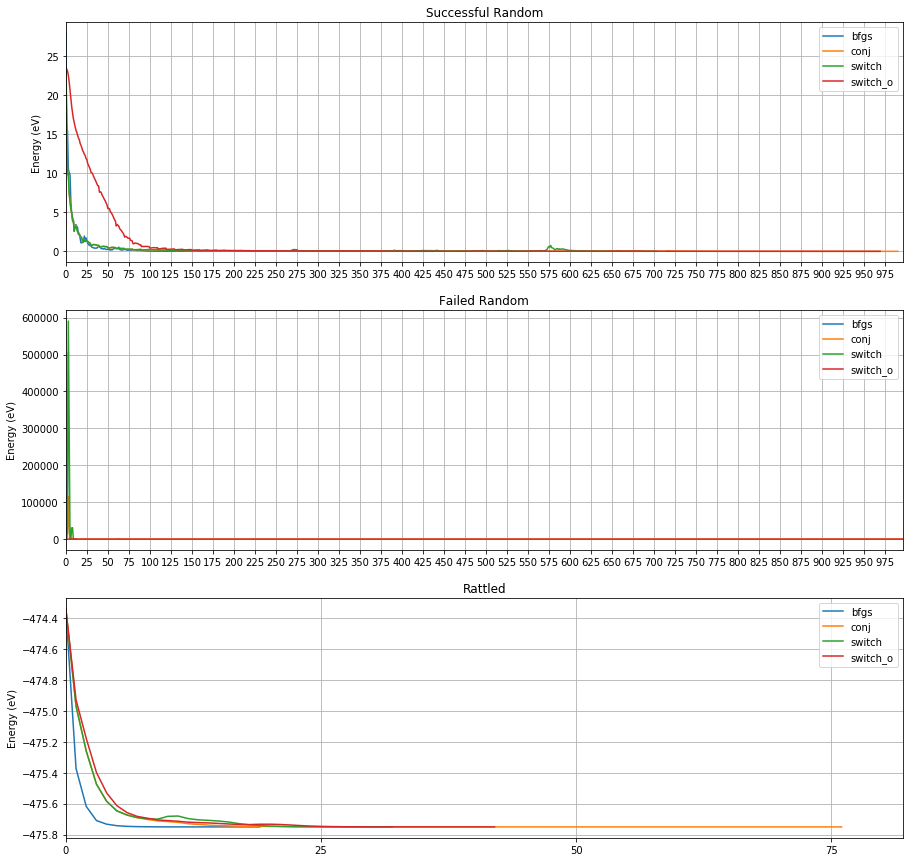

In [6]:
''' Mean of gnorm value per iteration '''

filename = 'iters'
df = pd.read_csv(FILENAME, skipinitialspace=True)
dfg = pd.read_csv(TESTDIR+'/'+filename+'_gnorm.csv', skipinitialspace=True)
methods = list(df['method'].unique()) # list of methods

fig, axs = plt.subplots(3, 1, figsize=(15,15))

# Random 
random = df[df['structure'].str.contains(
        "rat") == False]

xticks = 0
for method in methods: # for each method keep structures from both dfs

    total_m = random.loc[(random['method'] == method)][['structure',
                                                   'opt_succ']].set_index('structure')
    dfg_m = dfg[dfg['method'] == method] # results for this method 
    dfg_m.set_index('structure')
    e_res = dfg_m.join(total_m, on='structure') # join on each struct

    # find successful cases
    e_succ = e_res.loc[e_res['opt_succ'] == True]
    e_succ.drop(['opt_succ'], axis=1)
    mean = e_succ.groupby(['method']).mean().T # mean of each iteration in one column
    mean.columns = ['energy']

    axs[0].plot(mean['energy'], label=method)
    axs[0].legend()
    lmean = len(mean.dropna())
    xticks = lmean if lmean > xticks else xticks
    
    # find failed cases
    e_fail = e_res.loc[e_res['opt_succ'] == False]
    e_fail.drop(['opt_succ'], axis=1)
    mean = e_fail.groupby(['method']).mean().T # mean of each iteration in one column
    mean.columns = ['energy']

    axs[1].plot(mean['energy'], label=method)
    axs[1].legend()
    
axs[0].grid()
axs[0].set_title('Successful Random')
axs[0].set_ylabel('Energy (eV)')
# axs[0].set_ylim(starty, -300)
axs[0].set_xlim(0, xticks+5)
axs[0].set_xticks(np.arange(0, xticks+5, 25))
starty, endy = axs[0].get_ylim()

axs[1].grid()
axs[1].set_xlim(0, xticks+5)
axs[1].set_xticks(np.arange(0, xticks+5, 25))
# axs[1].set_ylim(starty, endy)
axs[1].set_title('Failed Random')
axs[1].set_ylabel('Energy (eV)')
# axs[1].ticklabel_format(style='plain', axis='y', scilimits=(0,0))


# Rattled
rattled = df[df['structure'].str.contains(
        "rat") == True]

xticks = 0
for method in methods: # for each method keep structures from both dfs

    total_m = rattled.loc[(rattled['method'] == method)][['structure',
                                                   'opt_succ']].set_index('structure')
    dfe_m = dfe[dfe['method'] == method] # results for this method 
    dfe_m.set_index('structure')
    e_res = dfe_m.join(total_m, on='structure') # join on each struct

    # find successful cases
    e_succ = e_res.loc[e_res['opt_succ'] == True]
    e_succ.drop(['opt_succ'], axis=1)
    mean = e_succ.groupby(['method']).mean().T # mean of each iteration in one column
    mean.columns = ['energy']

    axs[2].plot(mean['energy'], label=method)
    axs[2].legend()
    lmean = len(mean.dropna())
    xticks = lmean if lmean > xticks else xticks
    
axs[2].grid()
axs[2].set_title('Rattled')
axs[2].set_ylabel('Energy (eV)')
axs[2].set_xlim(0, xticks+5)
axs[2].set_xticks(np.arange(0, xticks+5, 25))
starty, endy = axs[2].get_ylim()

plt.savefig(PLOTDIR+'/'+'MeanGnormIterII', format=FORMAT)
plt.show()